<a href="https://colab.research.google.com/github/JuanDa14Sa/DigitDetection-SVD/blob/main/DigitDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detección de dígitos
## Juan David Sánchez, David Halliday, Christian Pabón, Tania Vásquez

En este notebook vamos a desarrollar un algoritmo basado en la descomposición en valores singulares *SVD* que permita la clasificación de digitos a partir del dataset MNIST

<div style="text-align: justify">

### Descripción del Modelo 
El modelo recibe una imagen $28 \times 28$ a blanco y negro, la cual se *aplana* a un vector de $784$ componentes. La predicción consiste en calcular la distancia entre el vector y sus proyecciones con respecto a cada uno de los subespacios que se obtienen mediante las columnas de la matriz $U$ correspondiente a la descomposición en valores singulares *(SVD)* de cada clase de dígito.

En el arreglo numsT se almacenan 10 matrices, una por dígito, en la que cada matriz cumple que sus columnas corresponden a imágenes de entrenamiento. Dichas matrices son las que descomponemos mediante valores singulares *(SVD)*, obteniendo una matriz $U$ por cada digito.

 Esta matriz tiene una característica particular y es que los vectores columna conforman una base ortonormal, utilizando los vectores de la base obtenemos la proyección del vector que representa la imagen, es decir, se halla el punto más cercano a la imagen dentro del hiperplano generado por las columnas de cada $U$. Posteriormente, por medio de la función **GetClosestDigit** se encuentra el vector en el hiperplano de cada dígito, así brevemente calculando la distancia de imagen a la proyección y devolver el digito cuya distancia de la imagen a la proyección sobre el hiperplano fue la mínima, o en dado caso alguna de las minimales. 

Mediante la función **GetClosestDigit** calculamos dicha proyección y luego obtenemos la distancia entre nuestro vector y la proyección, usando la métrica euclideana. Finalmente, repetimos este proceso para cada clase de dígito y tomamos la menor distancia como la clasificación correcta.
<div/>


# Librerías y datos

In [ ]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import random
import sys
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

Dividimos los datos en datos de entrenamiento y datos de prueba. En total tenemos $60000$ imagenes de entrenamiento y $10000$ de prueba.

In [ ]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# Preprocesamiento de datos

In [ ]:
nums = [[],[],[],[],[],[],[],[],[],[]] #los ejemplos del número 1 planos están en la posición 1 de la lista, ejemplo nums_1 = nums[1], nums_2 = nums[2]....

for i in range(len(X_train)):
    img = list(np.array(X_train[i]).flatten()) #La matriz aplanada
    targ = y_train[i] 
    nums[targ].append(img)

numsT = nums.copy()

for i in range(len(nums)):                      # Trasponer cada matriz aplanada en fila para convertirla en columna 
    numsT[i] = np.array(numsT[i]).transpose()

numsT                                            #los ejemplos del número i están como columnas planas en la posición i-ésima de la lista.

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
 

Acá podemos observar un muestreo aleatorio del tipo de imágenes que tenemos para cada dígito

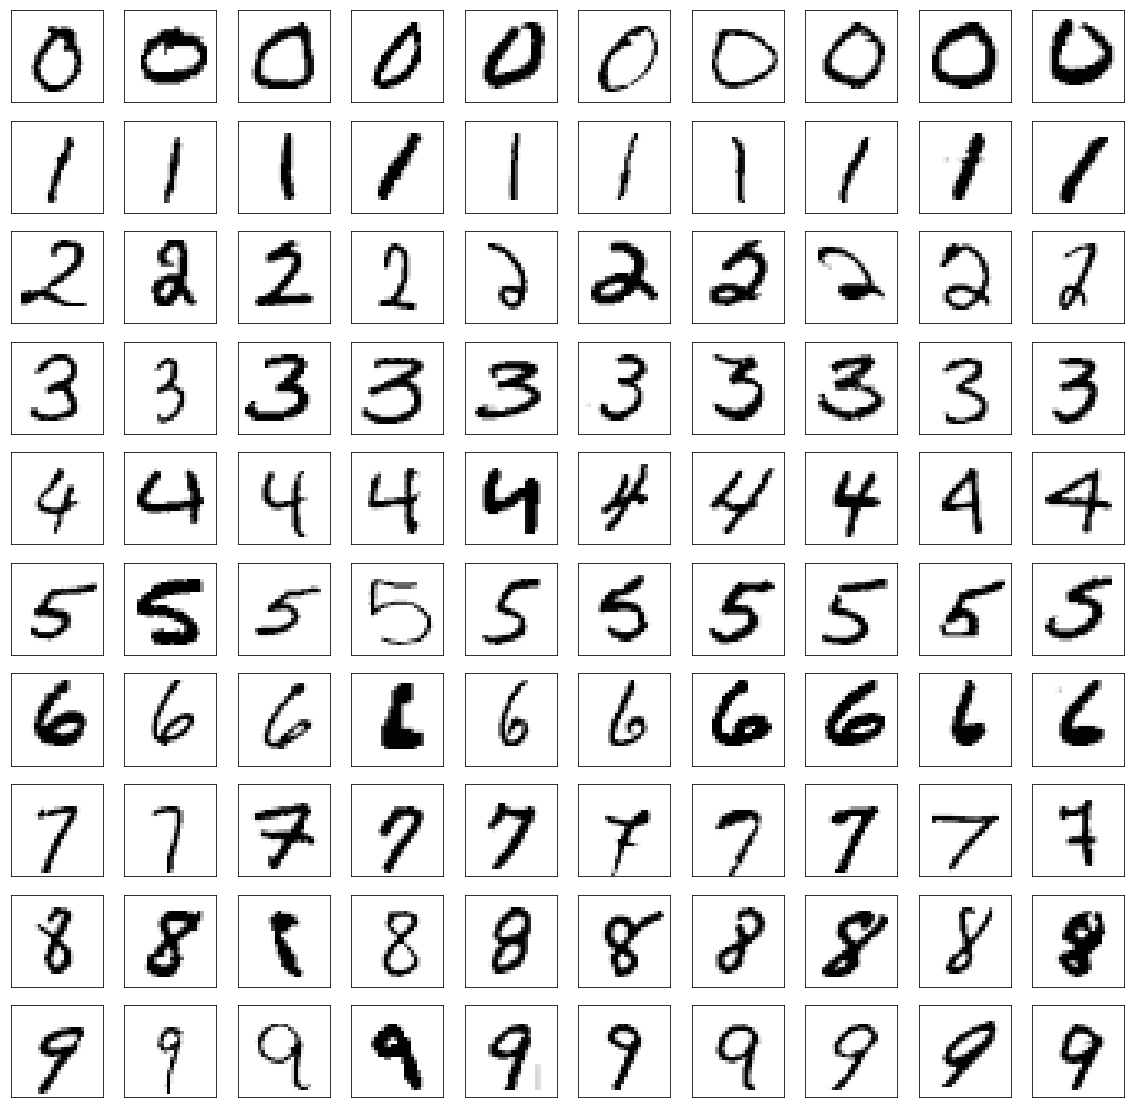

In [ ]:
n = 10                                   #Cantidades de imágenes
m = 10
fig, ax = plt.subplots(nrows=n, ncols=m, figsize=(20,20))  #tamaño de imágenes
plt.gray()
for i in range(n):
    num = np.array(numsT[i]).transpose()
    for j in range(m):
        img = random.choice(num).reshape((28, 28))          #toma aleatoriamente un numero de los ejemplos
        ax[i, j].matshow(img, cmap='Greys')
        ax[i, j].set_xticks([]), ax[i, j].set_yticks([])

plt.show()

# SVD

Usamos la funcion ``` np.linalg.svd ``` que hace una descomposición en valores singulares por medio Lapack(Linear Algebra Package) 

Recordemos que al realizar esta descomposición para una matriz $A$ de tamaño $n\times m$ obtenemos

$$A=USV^T,$$

donde $U$ es una matriz $n\times n$, $S$ es una matriz rectangular diagonal $n\times m$, cuya diagonal corresponde a los valores singulares de la matriz ordenados de mayor a menor, y $V$ es una matriz $m\times m$. Las columnas de $U$ y $V$ conforman bases ortonormales.


Usaremos la notación $U_i$ para la matriz $U$ obtenida para una clase de digito en particular.



In [ ]:
u = []  #arreglo para guardar las u's que salen del SVD
s = []  #arreglo para guardar las s's que salen del SVD
v = []  #arreglo para guardar las v's que salen del SVD
for digit_matrix in numsT:
    u_ , s_, v_ = np.linalg.svd(digit_matrix, full_matrices=False)
    u.append(u_)
    s.append(s_)
    v.append(v_)

Recordemos que al organizar los valores singulares de $S$, se puede interpretar que las columnas de $U$ están organizadas por su importancia. Veamos la importancia de cada valor propio (obtenido tomando el cuadrado del valor singular)

Text(0.5, 0, 'Porcentaje Valor Propio')

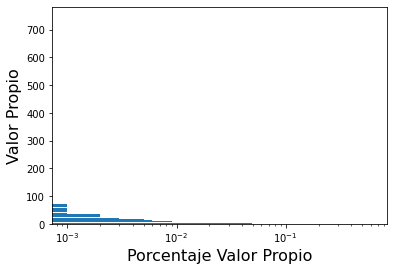

In [ ]:
u_zero = u[0]
s_zero = s[0]

Porcentaje_Valor_Propio = np.round(s_zero**2/np.sum(s_zero**2), decimals=3)
 

plt.barh(range(len(Porcentaje_Valor_Propio)), Porcentaje_Valor_Propio)
plt.ylabel('Valor Propio', fontsize=16)
plt.ylim(0,783)
plt.xscale('log')
plt.xlabel('Porcentaje Valor Propio', fontsize=16)

A partir del valor propio número $100$ la contribución es muy pequeña, por lo que se podría tomar solo $100$ columnas de $U$ para realizar la clasificación, sin embargo vamos a utilizar todas. 

Veamos un ejemplo de como se ven las primeras tres columnas de $U_0$ al ser transformadas a imagenes.

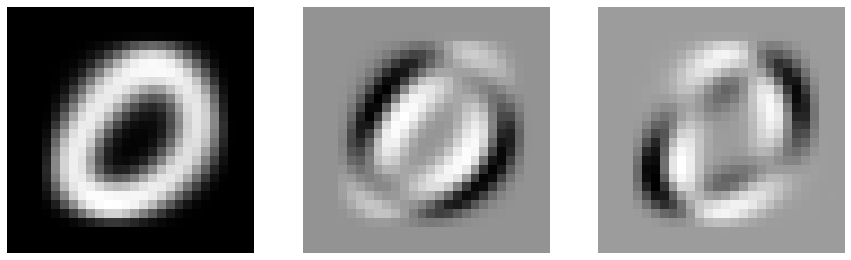

In [ ]:
fig , ax = plt.subplots(1,3, figsize=(15,10))
for i in range(3):
    ax[i].matshow(u_zero[:,i].reshape(28,28),cmap='Greys')#Primeras 3 columnas de U
    ax[i].axis('off')

# Clasificación

Se crean dos funciones ```ProjectOnHyperplane(Basis_, Point_)```y ```GetClosestDigit(Array_)```.

La primera es para obtener la proyección en el hiperplano generado por las columnas de $U$. 

La segunda función obtiene la distancia con la cual se hace la clasificacion del dígito, se itera sobre los 10 posibles dígitos obteniendo las proyecciones con las 10 matrices $U_i$ del SVD, luego de esto se hace la comparación y se retorna cual es el dígito que tiene la menor distancia. La distancia $d$ de una imagen $x$ se calcula como 

$$d = \|x-proj_U(x)\|_2$$



In [ ]:
def ProjectOnHyperplane(Basis_, Point_): 
  return np.sum((np.dot(Point_, Basis_)*Basis_), axis=1)

In [ ]:
def GetClosestDigit(Array_):
  ClosestDigit = 0
  ClosestDistance = sys.maxsize
  for i in range(10):
    ProjectionVector = ProjectOnHyperplane(u[i], Array_)
    Distance = np.linalg.norm(Array_ - ProjectionVector)
    if(Distance < ClosestDistance):
      ClosestDistance = Distance
      ClosestDigit = i
  return ClosestDigit, ClosestDistance

Por ejemplo, tomemos una imagen y veamos como la clasifica

In [ ]:
TestImage = np.array(numsT[0]).transpose()[2]

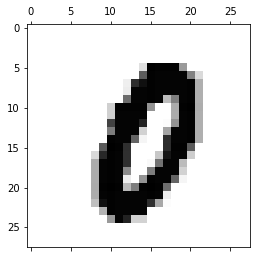

In [ ]:
plt.matshow(TestImage.reshape(28,28), cmap='Greys')

In [ ]:
GetClosestDigit(TestImage)

(0, 3.2636814944993347e-12)

Se clasificó de forma correcta.

#Evaluación


En esta función se hace la evaluación del modelo comparando los resultados con los datos de test con la predicción y se entrega el porcentaje de aciertos del modelo 


In [ ]:
def scoring(X_test_, y_test):
    true_pred = 0
    predictions = []
    for i in range(len(X_test_)):
        prediction = GetClosestDigit(X_test_[i])[0]
        predictions.append(prediction)
        if prediction == y_test[i]:
            true_pred+=1
    return true_pred/len(X_test_), predictions

In [ ]:
X_test_ = []
for vec in X_test:
    X_test_.append(vec.flatten())

score, predictions = scoring(X_test_, y_test)

Vemos que el modelo acerto un $69\%$ de las veces.

In [ ]:
score

0.6956

Veamos la [matriz de confusión](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) de nuestro modelo, en términos de porcentajes. El elemento en la posición $i,j$ de la matriz representa el número de veces que un elemento de la clase $i$ se clasifica en la clase $j$ sobre el número total de elementos en la clase $i$

Text(0.5, 69.0, 'Valor predicho')

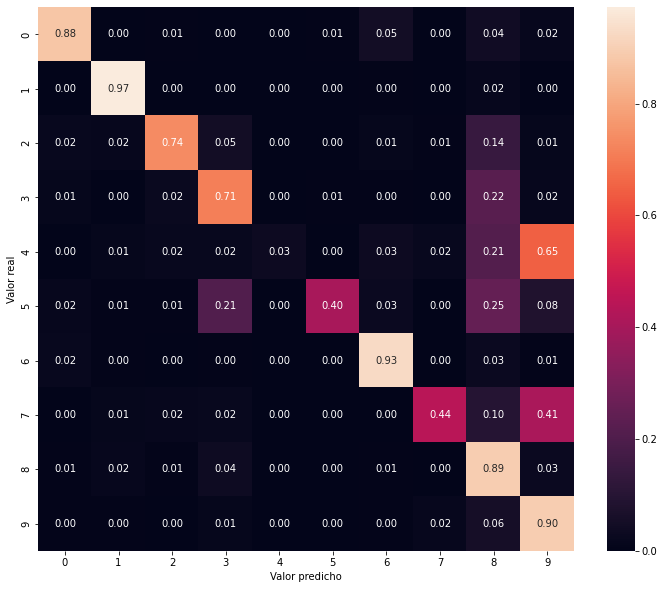

In [ ]:
conf_matrix = confusion_matrix(y_test, predictions, normalize='true')
df_cm = pd.DataFrame(conf_matrix, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='.2f')
plt.ylabel('Valor real')
plt.xlabel('Valor predicho')

#Conclusión

El método de SVD para clasificación no resulta bueno, tanto en tiempo como en precisión. El tiempo se puede mejorar usando ideas como el [Truncated SVD](https://langvillea.people.cofc.edu/DISSECTION-LAB/Emmie'sLSI-SVDModule/p5module.html), sin embargo la precisión es un factor determinante para descartar el uso del SVD en este caso.